# ndd module Tutorial

Welcome to the ndd (eNtropy from Discrete Data) module Tutorial

## What is **ndd** about

The main goal of **ndd** is to provide a simple and minimal Python interface to the Nemenman-Shafee-Bialek (NSB)  algorithm, a state of the art Bayesian algorithm for entropy estimation. In **ndd**, this interface is the ndd.entropy() function, that returns an estimate from an array of counts over a set of outcomes: entropy_estimate = ndd.entropy(counts). ndd.entropy() relies on an efficient and numerically robust Fortran implementation of the NSB algorithm. 

## Entropy and dice rolls

In this tutorial we will test the **ndd** module on some simple datasets. 
First, import the module:

In [40]:
import ndd

we will also need numpy and plotting libraries

In [37]:
import numpy as np
from matplotlib import pylab

#tell matplotlib to plot inline
%matplotlib inline

#increase the font size and markers size
from matplotlib import rc
rc('font', size=20)
rc('lines', markersize=12)

As input data, we need a list of integers $\{n_i\} \equiv \{n_1,n_2,...,n_k\}$ representing counts of the occurrences of values within a set of $k$ possible outcomes. For example, we can roll a six-sided dice ($k$ = 6 possible outcomes) for 1000 times and count the number of times we observe the six different faces:

In [51]:
def dice_rolls(k,n):
    import numpy as np
    p = np.full(k,1.0/k)                # the probability of each face is 1/k
    counts = np.random.multinomial(n,p) # generate random counts according to p
    return counts
k = 6
n = 1000
counts = dice_rolls(k,n)
counts

array([172, 180, 181, 166, 148, 153])

For a fair dice with six faces, the probability of each face is exactly $\pi_i = 1/6$ and the entropy $H({\boldsymbol \pi})$ of the associated probability distribution ${\boldsymbol \pi}$ is exactly $\log(6)$. 
The standard "plugin" estimator:
$$H_{\rm plugin}(\{n_i\}) = \sum_{i=1,k} \left(\frac{n_i}{n}\right) \log \left(\frac{n_i}{n}\right)$$
approximate the true distribution ${\boldsymbol \pi}$ with the empirical distribution $\hat{\boldsymbol \pi}$ where $\pi_i = n_i/n$. $H_{plugin}$ can be computed using the **ndd** module and compared with $\log(6)$:

In [72]:
H_true = np.log(6.0)
H_plugin = ndd.entropy(counts,algorithm='plugin') 
import scipy.stats
H_plugin_scipy = scipy.stats.entropy(counts) # this is the same estimator from scipy.stats, for comparison
print('true entropy: %s; (ndd, scipy) plugin est.: %s, %s' % (H_true,H_plugin,H_plugin_scipy))

true entropy: 1.79175946923; (ndd,scipy) plugin est.: 17.8471334646,17.8471334646


$n>>k$, ${\boldsymbol \pi}$ is well-sampled and the plugin estimator gives a good approximation of the exact value for the entropy. Actually, we are much more interested in the opposite situation, i.e. when the number of possible outcomes is much larger than the number of trials; for example when throwing a 1000-faced dice for 6 times. Unfortunately, the plugin estimator has a strong negative bias in this regime:

In [99]:
k = 1000
n = 6
counts = dice_rolls(k,n)
H_true = np.log(k)
H_plugin = ndd.entropy(counts,algorithm='plugin') 
print('true entropy: %s; plugin est.: %s' % (H_true,H_plugin))

true entropy: 6.90775527898; plugin est.: 1.79175946923


In this regime, the Bayesian NSB algorithm is a much better estimator: 

In [91]:
H_nsb = ndd.entropy(counts,algorithm='nsb') 
print('true entropy: %s; NSB est.: %s' % (H_true,H_nsb))

true entropy: 6.90775527898; NSB est.: 6.85923091348


and is the default algorithm for entropy estimation of **ndd** i.e. it will be used if the "algorithm" argument is not specified by the user. Moreover, the Bayesian formalism can be used to obtain an estimate for the error in the estimate (as the standard deviation of the NSB estimate over Dirichlet-multinomial posteriors, see the papers): 

In [92]:
H_nsb,err = ndd.entropy(counts,est_error=1) 
print('true entropy: %s; NSB est.: %s +/- %s' % (H_true,H_nsb,err))

true entropy: 6.90775527898; NSB est.: 6.85923091348 +/- 0.0315053822593


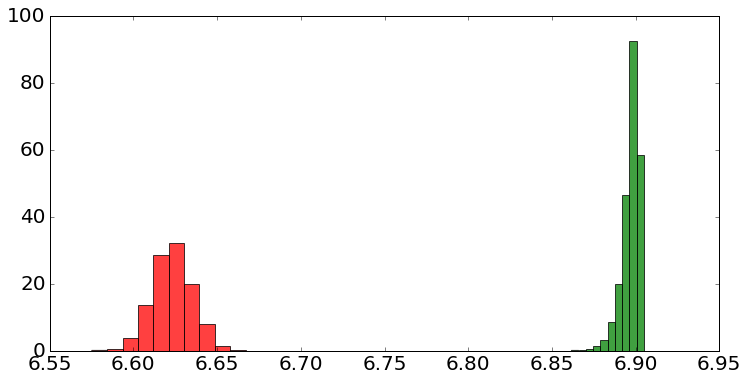

In [98]:
def plotter(k,n):    
    rolls = [dice_rolls(k,n) for i in range(10000)]
    x = [[ndd.entropy(r),ndd.entropy(r,algorithm='plugin')] for r in rolls]
    y = np.array(x)
    #z = np.array([ndd.entropy(dice_rolls(k,n),algorithm='plugin') for i in range(1000)])
    hist,bins,patches = pylab.hist(y[:,0],bins=10,normed=1,facecolor='green',alpha=0.75)
    hist,bins,patches = pylab.hist(y[:,1],bins=10,normed=1,facecolor='red',alpha=0.75)
    #hist,bins,patches = pylab.hist(z,bins=20,normed=1,facecolor='blue',alpha=0.75)
k=1000;n=2000

pylab.figure(figsize=(12,6))

plotter(k,n)
#plotter(scipy.stats.entropy,'red',fair_data)